# **Polynomial Regression**
---
# Importing libraries and initializing variables :

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Extracting Data from csv to Dataframes

df_train = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/ML Bootcamp data/polynomial_train.csv",index_col = 0)  
df_test = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/ML Bootcamp data/polynomial_test_data.csv")

# Splitting Labelled Data for calculating accuracy

train_data = df_train.iloc[:45000,:-1].to_numpy()               # Labelled Training Data
label_train = df_train["label"].values[:45000]    

X_test = df_train.iloc[45000:50000,:-1].to_numpy()              # Labelled Testing Data
label_test = df_train["label"].values[45000:50000]             

deg = 5  # 5 is best                                            # Degree of polynomial

# Standardizing features w.r.t Training data

X = (train_data - np.mean(train_data,axis= 0 ))/np.std(train_data,axis= 0)
X_test = (X_test - np.mean(train_data,axis= 0 ))/np.std(train_data,axis= 0)

# Standardizing labels w.r.t Training labels

y = (label_train - np.mean(label_train,axis = 0))/np.std(label_train,axis = 0)
y_test = (label_test - np.mean(label_train,axis = 0))/np.std(label_train,axis = 0)

def poly(X,degree):                                 # Function to generate polynomial
    
    x = np.ones(X.shape[0])
    for i in range(degree+1):
      for j in range(degree+1):
        for k in range(degree+1):
            if(i+j+k<=degree):
                x = np.vstack([x,X[:,0]**i*X[:,1]**j*X[:,2]**k])
    x = x[1:,:].T
    return x

x = poly(X,deg)                                    # Creating labelled training polynomial
x_test = poly(X_test,deg)                          # Creating labelled testing polynomial 

print(x.shape)                                     # Checking dimensions

(45000, 56)


# Useful functions:

In [2]:
def Plot(x,y,x_test,y_test):            # For plotting train and test data together
    plt.scatter(x,y,c ='k')
    plt.scatter(x_test,y_test,c='r')
    plt.xlabel("X -->")
    plt.ylabel("Y -->")
    plt.grid(True)
    plt.show()

In [3]:
def R2(x_test, m , y_test):                # R2 score to check accuracy of model against labelled test data
    y_pred = x_test @ m
    score = 1 - np.sum((y_pred-y_test)**2)/ np.sum((y_test-np.mean(y_test))**2)
    return score 

# Implementing Polynomial Regression:

After  1000  iterations: 
loss =  2.366455358199799e-10 , learning rate =  1e-05  Score =  99.99999996895734 %
After  2000  iterations: 
loss =  2.3607418684676744e-10 , learning rate =  1e-05  Score =  99.99999996903291 %
After  3000  iterations: 
loss =  2.355042804703698e-10 , learning rate =  1e-05  Score =  99.99999996910832 %
After  4000  iterations: 
loss =  2.349358129081205e-10 , learning rate =  1e-05  Score =  99.99999996918349 %
After  5000  iterations: 
loss =  2.343687803875134e-10 , learning rate =  1e-05  Score =  99.9999999692585 %
After  6000  iterations: 
loss =  2.3380317914590356e-10 , learning rate =  1e-05  Score =  99.9999999693333 %
After  7000  iterations: 
loss =  2.3323900543144353e-10 , learning rate =  1e-05  Score =  99.99999996940792 %
After  8000  iterations: 
loss =  2.3267625550177048e-10 , learning rate =  1e-05  Score =  99.99999996948236 %
After  9000  iterations: 
loss =  2.3211492562509458e-10 , learning rate =  1e-05  Score =  99.99999996955658 

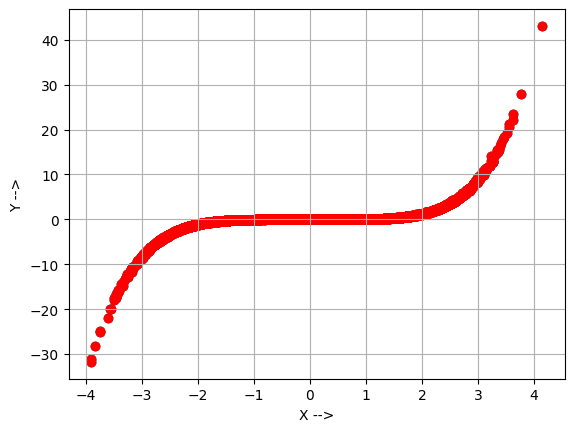

In [18]:
def ML(no_of_iterations,learning_rate,x, y , x_test, y_test):

    row,col = x.shape
    first,last = 0,0
    m = np.zeros(col)
    b = row 

    """Comment out the m below to start with random values of m"""
    
    m = np.load("/content/drive/MyDrive/Colab Notebooks/ML Bootcamp data/Polynomial_m.npy") # Using Stored values of weights and bias

    for i in range(no_of_iterations+1):

        y_pred = np.dot(x,m)                            # Predicted output
        loss = 0.5/b*np.sum((y_pred-y)**2)              # Mean Squared Error Loss

    # Update Rule:

        m = m - learning_rate/b*np.dot(x.T,y_pred- y)

        loss = 0.5/b*np.sum((y_pred-y)**2)
      
        if ((i+1) % 1000) == 0 :

            score = R2(x_test, m , y_test)              # Calculating R2 score

            print("After ",i+1, " iterations: ")
            print("loss = ",loss,", learning rate = ",learning_rate," Score = ",score*100,"%")

            np.save("/content/drive/MyDrive/Colab Notebooks/ML Bootcamp data/Polynomial_m.npy",m)  # Storing Weights and bias
            
    Plot(x[:,21],y,x[:,21],y_pred)                      # Plotting Output with labelled test data
    plt.show()
    return m 

param = ML(no_of_iterations=10000,learning_rate=1e-5,x= x,y= y, x_test= x_test,y_test=y_test)

# Predicting labels of Unlabelled test data :

In [ ]:
# Unlabelled Data:

test_data = df_test.iloc[:,1:].to_numpy()
ids = df_test.iloc[:,0].values

# Standardizing w.r.t Training features:

X = (test_data - np.mean(train_data,axis=0))/np.std(train_data,axis=0)

# Generating polynomial for unlabelled test data:

x_test = poly(X,deg)

param = np.load("/content/drive/MyDrive/Colab Notebooks/ML Bootcamp data/Polynomial_m.npy") # Using stored values of weights and bias

y_test = np.dot(x_test,param)         # Prediction           

# Scaling predictions w.r.t Training labels:

y_res = y_test * np.std(label_train,axis = 0) + np.mean(label_train,axis = 0)
res = pd.DataFrame([ids,y_res],index = ['Ids','Output']).T

# Storing Predictions into a .csv file

print(res)
res.to_csv("/content/drive/MyDrive/Colab Notebooks/ML Bootcamp data/Polynomial_Regression_result.csv")


           Ids        Output
0      78886.0 -5.362423e+02
1      35987.0  2.431097e+05
2      63576.0  4.997851e+03
3      86537.0 -2.059170e+06
4      45235.0 -3.648722e+04
...        ...           ...
19995  42763.0 -1.303388e+04
19996  52748.0 -5.549475e+02
19997  42159.0  5.102975e+01
19998  22095.0 -7.716689e+01
19999  80712.0 -1.105495e+05

[20000 rows x 2 columns]
